**References:**
* http://www.hvass-labs.org/
* https://www.youtube.com/channel/UCbba38V6vcglqVL--8kVVmg

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
print("Using TensorFlow Version:: ", tf.__version__)

Using TensorFlow Version::  1.9.0


## Load Data

In [3]:
from mnist import MNIST

In [4]:
data = MNIST(data_dir="data/MNIST/")

In [5]:
print("Train Examples: ", data.num_train)
print("Test Examples: ", data.num_test)
print("Validation Examples: ", data.num_val)

Train Examples:  55000
Test Examples:  10000
Validation Examples:  5000


In [6]:
# The images are stored in one-dimensional arrays of this length.
img_size_flat = data.img_size_flat
print("Image Size Flat: ", img_size_flat)


# Tuple with height and width of images used to reshape arrays.
img_shape = data.img_shape
print("Image Shape: ", img_shape)

# Number of classes, one class for each of 10 digits.
num_classes = data.num_classes
print("Num Classes: ", num_classes)

Image Size Flat:  784
Image Shape:  (28, 28)
Num Classes:  10


## One-Hot Encoding

In [7]:
data.y_train[0:5, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
data.y_train_cls[0:5]

array([5, 0, 4, 1, 9])

In [9]:
data.x_train.shape

(55000, 784)

In [10]:
print("One Example Training Dataset: ")
data.x_train[0,:]

One Example Training Dataset: 


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## TensorFlow Computation Graph

#### Placeholder Variables:

In [11]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [12]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [13]:
y_true_cls = tf.placeholder(tf.int64, [None])

#### Updatable Variables for Optimizations:

In [14]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

In [15]:
biases = tf.Variable(tf.zeros([num_classes]))

#### Model

In [16]:
logits = tf.matmul(x, weights) + biases

In [17]:
y_pred = tf.nn.softmax(logits)

In [18]:
y_pred_cls = tf.argmax(y_pred, axis=1)

#### Cost Function

In [19]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels=y_true)

In [20]:
cost = tf.reduce_mean(cross_entropy)

#### Optimization Method

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

## Train

In [22]:
session = tf.Session()

In [23]:
batch_size = 100

In [24]:
def train_net(num_of_iterations):
    session.run(tf.global_variables_initializer())
    for i in range(num_of_iterations):
        x_batch, y_true_batch, _ = data.random_batch(batch_size=batch_size)
        
        feed_dict_train = {x:x_batch, y_true:y_true_batch}
        
        session.run(optimizer, feed_dict=feed_dict_train)

In [25]:
train_net(10)

## Model Evaluation Metrics

In [26]:
correct_predictions = tf.equal(y_true_cls, y_pred_cls)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [27]:
def print_accuracy(feed_dict_test):
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

## Train and Evaluate Model

In [28]:
feed_dict_test = {x: data.x_test,
                  y_true_cls: data.y_test_cls}

In [29]:
train_net(100)
print_accuracy(feed_dict_test)

Accuracy on test-set: 89.7%


In [30]:
train_net(1000)
print_accuracy(feed_dict_test)

Accuracy on test-set: 91.3%


In [31]:
train_net(10000)
print_accuracy(feed_dict_test)

Accuracy on test-set: 92.3%


In [32]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_predictions, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])
    
    

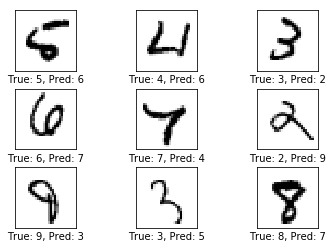

In [33]:
plot_example_errors()

In [34]:
session.close()